In [7]:
import xarray as xr
import rioxarray
import rasterio as rio
import geopandas as gp
from pathlib import Path

In [6]:
datapath = Path("/Volumes/FIREICE/fihyper/cwaigl/20200714_MKB/20200714-MKB_03/ATCOR/20200714-MKB_03_VNIR_SWIR_rad_float32_geo_atm.bsq")
maskpath = Path("/Volumes/FIREICE/fihyper/cwaigl/20200714_MKB/02_intermediate/vectormasks_cropped/vnir_swir_03_mask_buff10.shp")

In [3]:
testds = rioxarray.open_rasterio(datapath, ) 

In [4]:
testds

<xarray.DataArray (band: 459, y: 12601, x: 1951)>
[11284308909 values with dtype=int16]
Coordinates:
    fwhm         (band) float64 3.8 3.8 3.8 3.8 3.8 ... 6.52 6.52 6.52 6.52 6.52
    wavelength   (band) float64 410.4 413.5 416.7 ... 2.504e+03 2.509e+03
  * band         (band) int64 1 2 3 4 5 6 7 8 ... 453 454 455 456 457 458 459
  * x            (x) float64 3.382e+05 3.382e+05 ... 3.401e+05 3.402e+05
  * y            (y) float64 6.883e+06 6.883e+06 6.883e+06 ... 6.87e+06 6.87e+06
    spatial_ref  int64 0
Attributes:
    wavelength:                410.36
    _FillValue:                15000.0
    scale_factor:              1.0
    add_offset:                0.0
    long_name:                 ('band   1 refl [%*100] (410.36)', 'band   2 r...
    bands:                     459
    band_names:                band   1 refl [%*100], band   2 refl [%*100], ...
    byte_order:                0
    coordinate_system_string:  PROJCS["WGS_1984_UTM_Zone_6N",GEOGCS["GCS_WGS_...
    data_ignore_value:         15000
    data_type:                 2
    default_bands:             75.000000, 46.000000, 19.000000
    file_type:                 ENVI Standard
    header_offset:             0
    interleave:                BSQ
    lines:                     12601
    pixel_size:                       1.0000000,        1.0000000
    reflectance_scale_factor:  10000
    samples:                   1951
    x_start:                   1.00000
    y_start:                   1.00000
    z_plot_titles:              wavelength [nm], reflectance [%*100]

In [8]:
maskshape = gp.read_file(maskpath)

<AxesSubplot:>

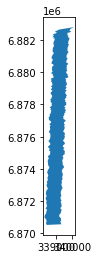

In [15]:
maskshape.plot()

In [ ]:
clippedds = testds.rio.clip(maskshape.geometry.values, maskshape.crs)